In [1]:
# Install required packages.
import os

#!pip install torch==1.7.0
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)


!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
!pip install git+https://github.com/rusty1s/pytorch_geometric.git

2.2.1+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 13.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/rusty1s/pytorch_geometric.git to /tmp/pip-req-build-027amp7j
  Running command git clone --filter=blob:none --quiet https://github.com/rusty1s/pytorch_geometric.git /tmp/pip-req-build-027amp7j
  Resolved https://github.com/rusty1s/pytorch_geometric.git to commit 38bb5f29375e9ba9dc56654af8d3f35551480f6e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import argparse
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from math import sqrt
import math

from torch_geometric.datasets import TUDataset

import torch as th
import torch
import torch.nn as nn
from torch.nn.parameter import Parameter
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch.nn import Linear, LayerNorm
from sklearn import metrics
from scipy.spatial.distance import hamming
import statistics
import pandas
from time import perf_counter
from IPython.core.display import deepcopy
from torch_geometric.nn import MessagePassing
import copy
from torch.nn import ReLU, Sequential
from torch import sigmoid
from itertools import chain
from time import perf_counter
import csv



from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.loader import DataLoader
import torch_geometric.nn as gnn

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = TUDataset(root='data/TUDataset', name='MUTAG')

Processing...
Done!


In [5]:
Explainability_name = 'GraphMask'
Task_name = 'Graph Classification'
Model_Name = "DGCNN"
DataSet_name = "MUTAG"
checkpoint_directory_Classifier = "/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/model_classifier.pt"
classifier_lr = 0.001
classifier_dropout = 0.1
classifier_weight_decay = 1e-6
classifier_bias = True


File_Name = Model_Name + " " + Explainability_name + " " + Task_name + " " + DataSet_name + " "

In [6]:
#train_dataset, test_dataset = train_test_split(dataset, test_size=0.3, random_state=0, shuffle=True)
#print("Number of Training Graphs: ", len(train_dataset))
#print("Number of Test Graphs: ", len(test_dataset))

df = pandas.read_csv("/content/drive/My Drive/Explainability Methods/Train and Test Indexes on Graph Classification/Experimental Results/train_test_indexes.csv")

read_training_list_indexes__ = df['Train Indexes']
read_test_list_indexes__ = df['Test Indexes']
read_test_list_indexes__ = read_test_list_indexes__.dropna()
read_test_list_indexes = []
read_training_list_indexes = []
for element in read_test_list_indexes__:
    read_test_list_indexes.append(int(element))
for element in read_training_list_indexes__:
    read_training_list_indexes.append(int(element))


print(read_training_list_indexes)
print(read_test_list_indexes)

train_dataset = []
test_dataset = []
for index in read_training_list_indexes:
    train_dataset.append(dataset[index])
for index in read_test_list_indexes:
    test_dataset.append(dataset[index])


print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

[51, 142, 143, 10, 4, 141, 125, 23, 3, 79, 28, 117, 136, 156, 83, 128, 109, 70, 31, 58, 7, 148, 14, 187, 20, 162, 123, 13, 91, 185, 169, 102, 32, 55, 119, 25, 161, 175, 52, 121, 152, 108, 113, 65, 39, 103, 131, 42, 166, 110, 160, 68, 90, 89, 64, 172, 159, 72, 170, 18, 122, 29, 179, 49, 171, 178, 9, 74, 96, 48, 181, 127, 126, 87, 12, 163, 88, 53, 94, 146, 5, 158, 16, 67, 6, 59, 164, 151, 34, 47, 54, 46, 100, 112, 93, 182, 66, 106, 124, 19, 186, 133, 45, 15, 40, 167, 174, 98, 105, 153, 61, 63, 132, 116, 43, 80, 33, 147, 165, 69, 135, 86, 76, 57, 173, 115, 138, 140, 134, 180, 95, 22, 38, 41, 24, 120, 145, 26, 21, 50, 176, 107, 78, 17, 85, 154, 60, 92, 184, 129]
[0, 1, 2, 8, 11, 27, 30, 35, 36, 37, 44, 56, 62, 71, 73, 75, 77, 81, 82, 84, 97, 99, 101, 104, 111, 114, 118, 130, 137, 139, 144, 149, 150, 155, 157, 168, 177, 183]
Number of training graphs: 150
Number of test graphs: 38


In [7]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [8]:
import sys
py_path = '/content/drive/MyDrive/Explainability Methods/Models/Script/'
sys.path.insert(0,py_path)
#import GCN_plus_GAP as Graph_Network
#GNN_Model = Graph_Network.GCN_plus_GAP(model_name='GCN_plus_GAP', model_level='graph', input_dim=7, hidden_dim=7, output_dim=2, num_hid_layers=2, Bias=classifier_bias, act_fun='eLu', Weight_Initializer=1, dropout_rate=classifier_dropout)

import DGCNN as dgcnn_model
GNN_Model = dgcnn_model.DGCNN_Model(GNN_layers=[32, 32, 32, 7], num_classes=2, mlp_act_fun='ReLu', dgcnn_act_fun='tanh', mlp_dropout_rate=0.5, Weight_Initializer=3, Bias=False, dgcnn_k=17, node_feat_size=7, hid_channels=[16,32], conv1d_kernels=[2,5], ffn_layer_size=128, strides=[2,1])

tanh is Selected.
tanh is Selected.


In [9]:
GNN_Model_Optimizer = torch.optim.Adam(GNN_Model.parameters(), lr=classifier_lr, weight_decay=classifier_weight_decay)

In [10]:
criterion = torch.nn.CrossEntropyLoss()
def loss_calculations(preds, gtruth):
    loss_per_epoch = criterion(preds, gtruth)
    return loss_per_epoch


In [11]:
def visualize_losses(GNN_Model_losses, epoch_history):
    GNN_Model_losses_list = torch.stack(GNN_Model_losses).cpu().detach().numpy()

    fig = plt.figure(figsize=(27,20))

    ax = plt.subplot2grid((3, 1), (0, 0), colspan=1)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(" Loss in Epoch: " + str(epoch_history))

    ax.plot(GNN_Model_losses_list, color='r')

    plt.savefig('/content/drive/My Drive/Explainability Methods/'+str(Explainability_name)+' on ' + str(Task_name) + '/Experimental Results/' + File_Name + 'Loss_til_epoch_{:04d}.png'.format(epoch_history))
    plt.show()


In [12]:
def train_step():
    GNN_Model_loss_batch = []
    Pred_Labels = []
    Real_Labels = []

    GNN_Model.train()
    GNN_Model.zero_grad()
    for batch_of_graphs in train_dataloader:
        #Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = GNN_Model(batch_of_graphs)
        #batch_loss = loss_calculations(soft, batch_of_graphs.y)
        #Pred_Labels.extend(soft.argmax(dim=1).detach().tolist())

        final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = GNN_Model(batch_of_graphs, None)
        batch_loss = loss_calculations(softmaxed_h2, batch_of_graphs.y)
        Pred_Labels.extend(softmaxed_h2.argmax(dim=1).detach().tolist())

        Real_Labels.extend(batch_of_graphs.y.detach().tolist())
        GNN_Model_loss_batch.append(batch_loss)

        batch_loss.backward()
        GNN_Model_Optimizer.step()

    return torch.mean(torch.tensor(GNN_Model_loss_batch)), metrics.accuracy_score(Real_Labels, Pred_Labels)

In [13]:
GNN_Model_training_Acc_per_epoch = []
GNN_Model_training_time_per_epoch = []
def train(EPOCHS, load_index):
    GNN_Model_training_loss_per_epoch = []

    for epoch in range(EPOCHS):
        t1 = perf_counter()
        GNN_Model_training_loss, training_acc = train_step()
        GNN_Model_training_time_per_epoch.append(perf_counter()-t1)
        print(f'Epoch: {epoch+1:03d}, Model Loss: {GNN_Model_training_loss:.4f}')

        GNN_Model_training_loss_per_epoch.append(GNN_Model_training_loss)
        GNN_Model_training_Acc_per_epoch.append(training_acc)
        #break

        if (epoch + load_index + 1) % 50 == 0 and epoch > 0:
            visualize_losses(GNN_Model_training_loss_per_epoch, epoch + load_index + 1)
        if (epoch + load_index + 1) % 100 == 0 and epoch > 0:
            torch.save({'epoch': epoch+load_index+1, 'model_state_dict': GNN_Model.state_dict(), 'optimizer_state_dict': GNN_Model_Optimizer.state_dict(), 'loss': GNN_Model_training_loss_per_epoch,}, "/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + File_Name + str(epoch + load_index + 1)+".pt")



Epoch: 001, Model Loss: 0.6915
Epoch: 002, Model Loss: 0.6851
Epoch: 003, Model Loss: 0.6746
Epoch: 004, Model Loss: 0.6463
Epoch: 005, Model Loss: 0.6175
Epoch: 006, Model Loss: 0.6111
Epoch: 007, Model Loss: 0.6138
Epoch: 008, Model Loss: 0.5995
Epoch: 009, Model Loss: 0.5758
Epoch: 010, Model Loss: 0.5632
Epoch: 011, Model Loss: 0.5520
Epoch: 012, Model Loss: 0.5261
Epoch: 013, Model Loss: 0.5018
Epoch: 014, Model Loss: 0.4881
Epoch: 015, Model Loss: 0.4725
Epoch: 016, Model Loss: 0.4628
Epoch: 017, Model Loss: 0.4567
Epoch: 018, Model Loss: 0.4671
Epoch: 019, Model Loss: 0.4557
Epoch: 020, Model Loss: 0.4570
Epoch: 021, Model Loss: 0.4652
Epoch: 022, Model Loss: 0.4524
Epoch: 023, Model Loss: 0.4481
Epoch: 024, Model Loss: 0.4461
Epoch: 025, Model Loss: 0.4495
Epoch: 026, Model Loss: 0.4543
Epoch: 027, Model Loss: 0.4523
Epoch: 028, Model Loss: 0.4635
Epoch: 029, Model Loss: 0.4679
Epoch: 030, Model Loss: 0.4304
Epoch: 031, Model Loss: 0.4376
Epoch: 032, Model Loss: 0.4475
Epoch: 0

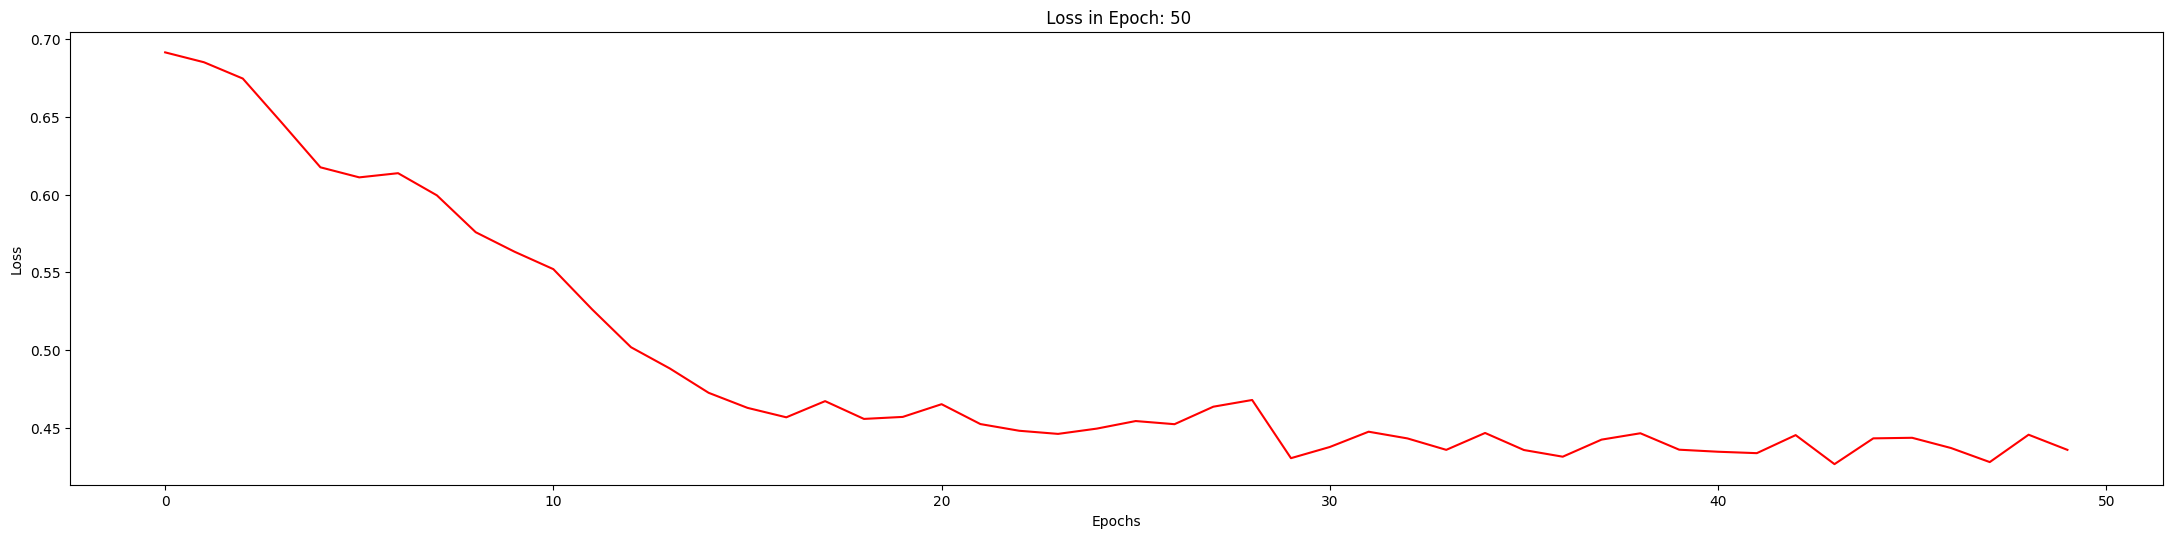

Epoch: 051, Model Loss: 0.4281
Epoch: 052, Model Loss: 0.4280
Epoch: 053, Model Loss: 0.4186
Epoch: 054, Model Loss: 0.4282
Epoch: 055, Model Loss: 0.4136
Epoch: 056, Model Loss: 0.4285
Epoch: 057, Model Loss: 0.4204
Epoch: 058, Model Loss: 0.4347
Epoch: 059, Model Loss: 0.4266
Epoch: 060, Model Loss: 0.4264
Epoch: 061, Model Loss: 0.4391
Epoch: 062, Model Loss: 0.4141
Epoch: 063, Model Loss: 0.4362
Epoch: 064, Model Loss: 0.4110
Epoch: 065, Model Loss: 0.4328
Epoch: 066, Model Loss: 0.4282
Epoch: 067, Model Loss: 0.4165
Epoch: 068, Model Loss: 0.4181
Epoch: 069, Model Loss: 0.4303
Epoch: 070, Model Loss: 0.4156
Epoch: 071, Model Loss: 0.4162
Epoch: 072, Model Loss: 0.4360
Epoch: 073, Model Loss: 0.4169
Epoch: 074, Model Loss: 0.4130
Epoch: 075, Model Loss: 0.4396
Epoch: 076, Model Loss: 0.4186
Epoch: 077, Model Loss: 0.4314
Epoch: 078, Model Loss: 0.4141
Epoch: 079, Model Loss: 0.4330
Epoch: 080, Model Loss: 0.4130
Epoch: 081, Model Loss: 0.4188
Epoch: 082, Model Loss: 0.4166
Epoch: 0

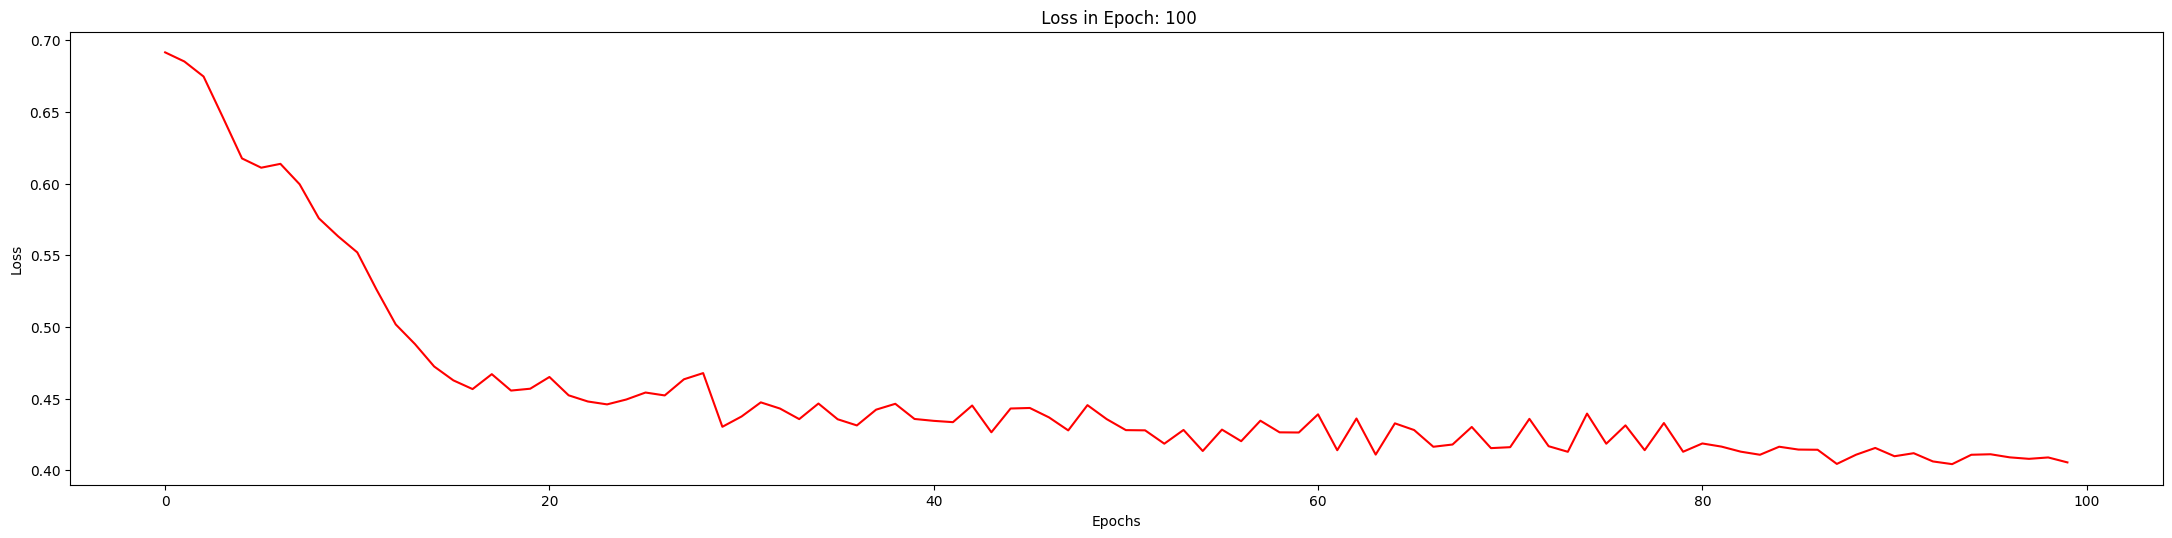

Epoch: 101, Model Loss: 0.4084
Epoch: 102, Model Loss: 0.4105
Epoch: 103, Model Loss: 0.4209
Epoch: 104, Model Loss: 0.4132
Epoch: 105, Model Loss: 0.4049
Epoch: 106, Model Loss: 0.4294
Epoch: 107, Model Loss: 0.4074
Epoch: 108, Model Loss: 0.4062
Epoch: 109, Model Loss: 0.4102
Epoch: 110, Model Loss: 0.4118
Epoch: 111, Model Loss: 0.4028
Epoch: 112, Model Loss: 0.4078
Epoch: 113, Model Loss: 0.4090
Epoch: 114, Model Loss: 0.4033
Epoch: 115, Model Loss: 0.4035
Epoch: 116, Model Loss: 0.4201
Epoch: 117, Model Loss: 0.4026
Epoch: 118, Model Loss: 0.4017
Epoch: 119, Model Loss: 0.4051
Epoch: 120, Model Loss: 0.4045
Epoch: 121, Model Loss: 0.4024
Epoch: 122, Model Loss: 0.4003
Epoch: 123, Model Loss: 0.4034
Epoch: 124, Model Loss: 0.4093
Epoch: 125, Model Loss: 0.4016
Epoch: 126, Model Loss: 0.4004
Epoch: 127, Model Loss: 0.4020
Epoch: 128, Model Loss: 0.4016
Epoch: 129, Model Loss: 0.4012
Epoch: 130, Model Loss: 0.4014
Epoch: 131, Model Loss: 0.4040
Epoch: 132, Model Loss: 0.4007
Epoch: 1

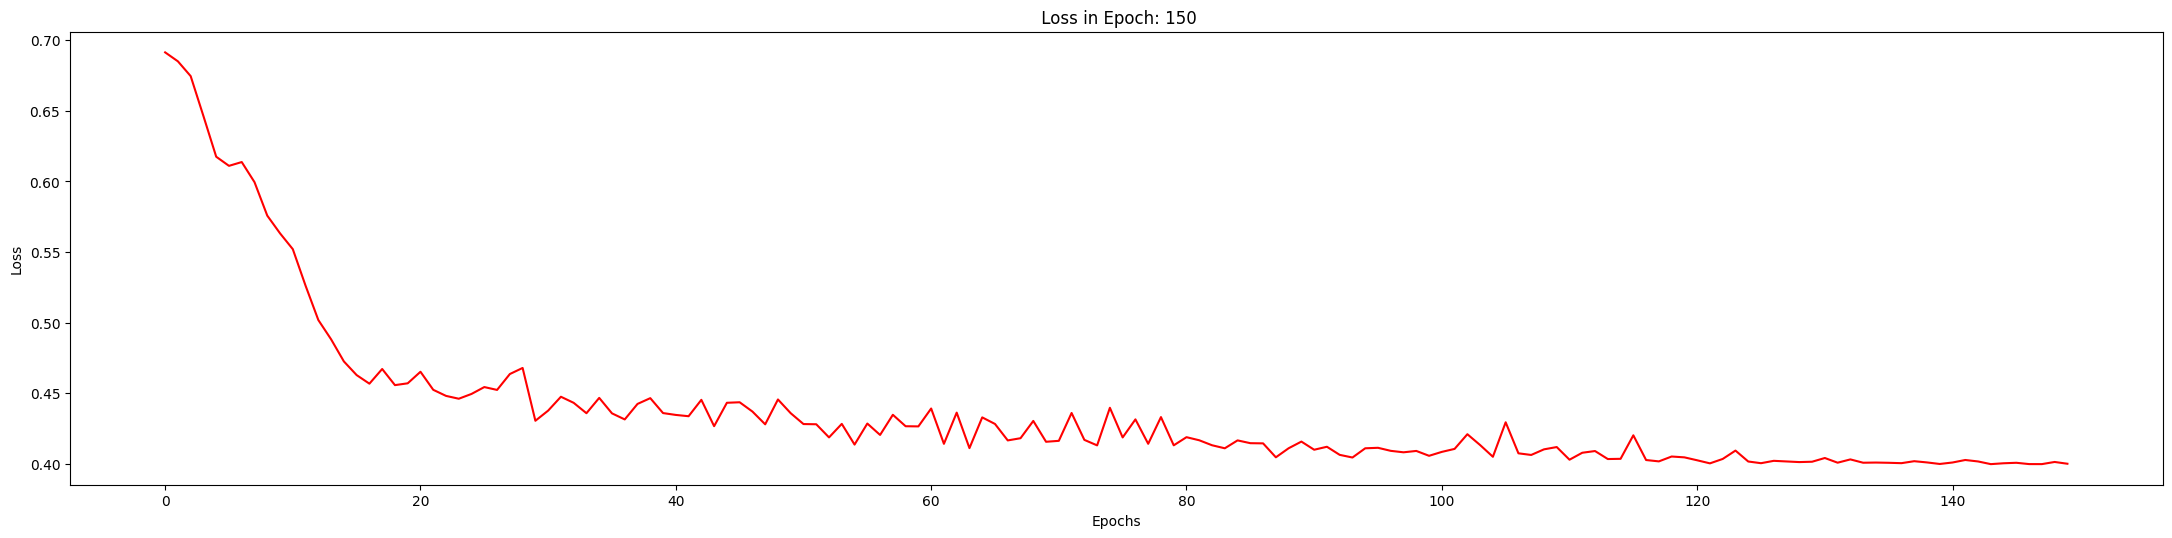

Epoch: 151, Model Loss: 0.4001
Epoch: 152, Model Loss: 0.4009
Epoch: 153, Model Loss: 0.3998
Epoch: 154, Model Loss: 0.3999
Epoch: 155, Model Loss: 0.3996
Epoch: 156, Model Loss: 0.3998
Epoch: 157, Model Loss: 0.4001
Epoch: 158, Model Loss: 0.3996
Epoch: 159, Model Loss: 0.4002
Epoch: 160, Model Loss: 0.4004
Epoch: 161, Model Loss: 0.3994
Epoch: 162, Model Loss: 0.4006
Epoch: 163, Model Loss: 0.4000
Epoch: 164, Model Loss: 0.3997
Epoch: 165, Model Loss: 0.3995
Epoch: 166, Model Loss: 0.3996
Epoch: 167, Model Loss: 0.3995
Epoch: 168, Model Loss: 0.4001
Epoch: 169, Model Loss: 0.3996
Epoch: 170, Model Loss: 0.3997
Epoch: 171, Model Loss: 0.3994
Epoch: 172, Model Loss: 0.3996
Epoch: 173, Model Loss: 0.3999
Epoch: 174, Model Loss: 0.4003
Epoch: 175, Model Loss: 0.3999
Epoch: 176, Model Loss: 0.3999
Epoch: 177, Model Loss: 0.3997
Epoch: 178, Model Loss: 0.3998
Epoch: 179, Model Loss: 0.3995
Epoch: 180, Model Loss: 0.3996
Epoch: 181, Model Loss: 0.3996
Epoch: 182, Model Loss: 0.3996
Epoch: 1

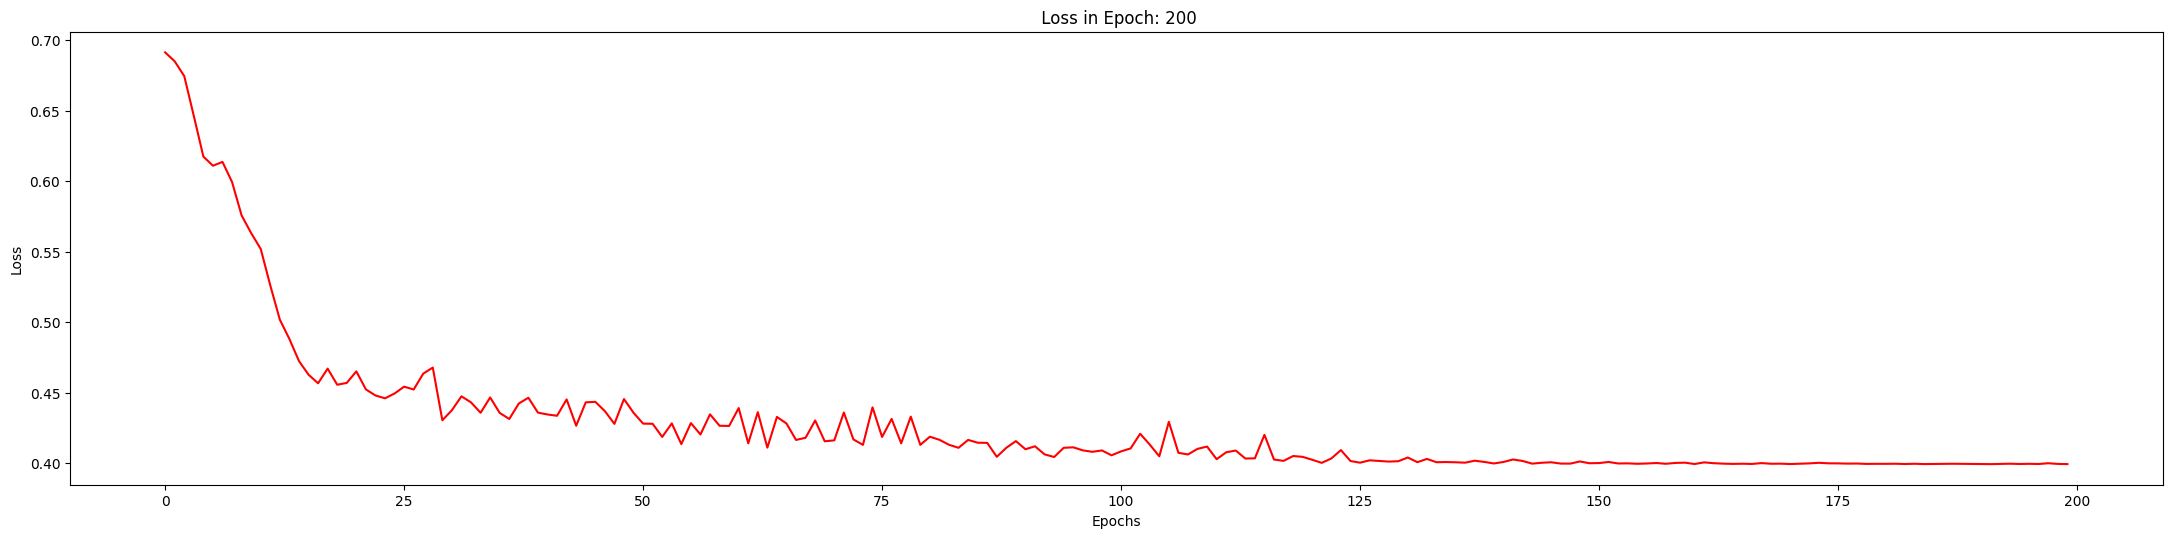

Epoch: 201, Model Loss: 0.3996
Epoch: 202, Model Loss: 0.3995
Epoch: 203, Model Loss: 0.3993
Epoch: 204, Model Loss: 0.3994
Epoch: 205, Model Loss: 0.3995
Epoch: 206, Model Loss: 0.3995
Epoch: 207, Model Loss: 0.3994
Epoch: 208, Model Loss: 0.3994
Epoch: 209, Model Loss: 0.3994
Epoch: 210, Model Loss: 0.3995
Epoch: 211, Model Loss: 0.3996
Epoch: 212, Model Loss: 0.3995
Epoch: 213, Model Loss: 0.3995
Epoch: 214, Model Loss: 0.3996
Epoch: 215, Model Loss: 0.3996
Epoch: 216, Model Loss: 0.3993
Epoch: 217, Model Loss: 0.3998
Epoch: 218, Model Loss: 0.3999
Epoch: 219, Model Loss: 0.3996
Epoch: 220, Model Loss: 0.3994
Epoch: 221, Model Loss: 0.3994
Epoch: 222, Model Loss: 0.3994
Epoch: 223, Model Loss: 0.3995
Epoch: 224, Model Loss: 0.3994
Epoch: 225, Model Loss: 0.3994
Epoch: 226, Model Loss: 0.3994
Epoch: 227, Model Loss: 0.3996
Epoch: 228, Model Loss: 0.3993
Epoch: 229, Model Loss: 0.3996
Epoch: 230, Model Loss: 0.3997
Epoch: 231, Model Loss: 0.3994
Epoch: 232, Model Loss: 0.3994
Epoch: 2

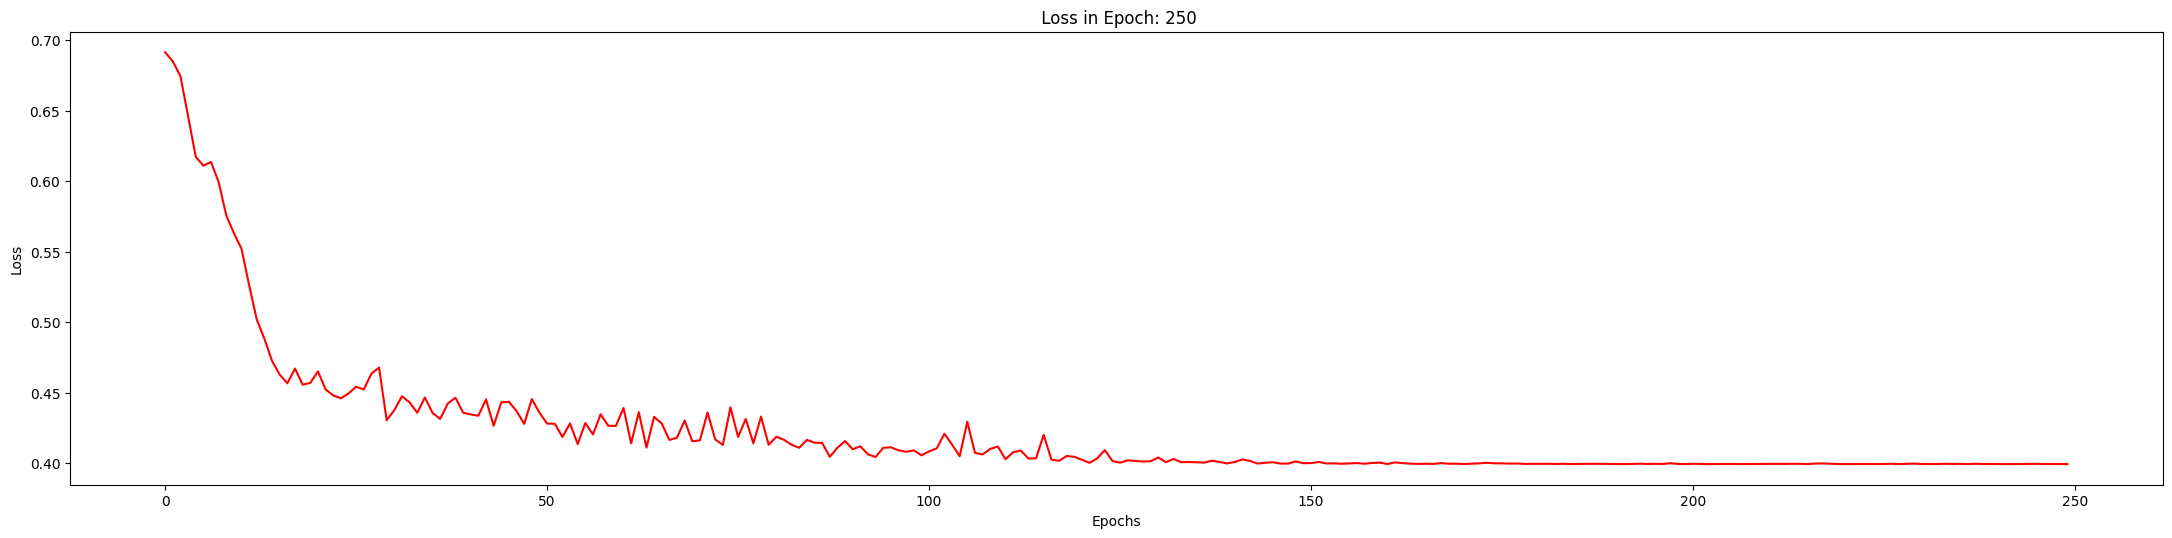

Epoch: 251, Model Loss: 0.3994
Epoch: 252, Model Loss: 0.3994
Epoch: 253, Model Loss: 0.3994
Epoch: 254, Model Loss: 0.3994
Epoch: 255, Model Loss: 0.3994
Epoch: 256, Model Loss: 0.3994
Epoch: 257, Model Loss: 0.3994
Epoch: 258, Model Loss: 0.3995
Epoch: 259, Model Loss: 0.3994
Epoch: 260, Model Loss: 0.3994
Epoch: 261, Model Loss: 0.3994
Epoch: 262, Model Loss: 0.3994
Epoch: 263, Model Loss: 0.3994
Epoch: 264, Model Loss: 0.3994
Epoch: 265, Model Loss: 0.3993
Epoch: 266, Model Loss: 0.3994
Epoch: 267, Model Loss: 0.3994
Epoch: 268, Model Loss: 0.3994
Epoch: 269, Model Loss: 0.3994
Epoch: 270, Model Loss: 0.3995
Epoch: 271, Model Loss: 0.3994
Epoch: 272, Model Loss: 0.3994
Epoch: 273, Model Loss: 0.3994
Epoch: 274, Model Loss: 0.3994
Epoch: 275, Model Loss: 0.3993
Epoch: 276, Model Loss: 0.3994
Epoch: 277, Model Loss: 0.3994
Epoch: 278, Model Loss: 0.3994
Epoch: 279, Model Loss: 0.3995
Epoch: 280, Model Loss: 0.3995
Epoch: 281, Model Loss: 0.3994
Epoch: 282, Model Loss: 0.3994
Epoch: 2

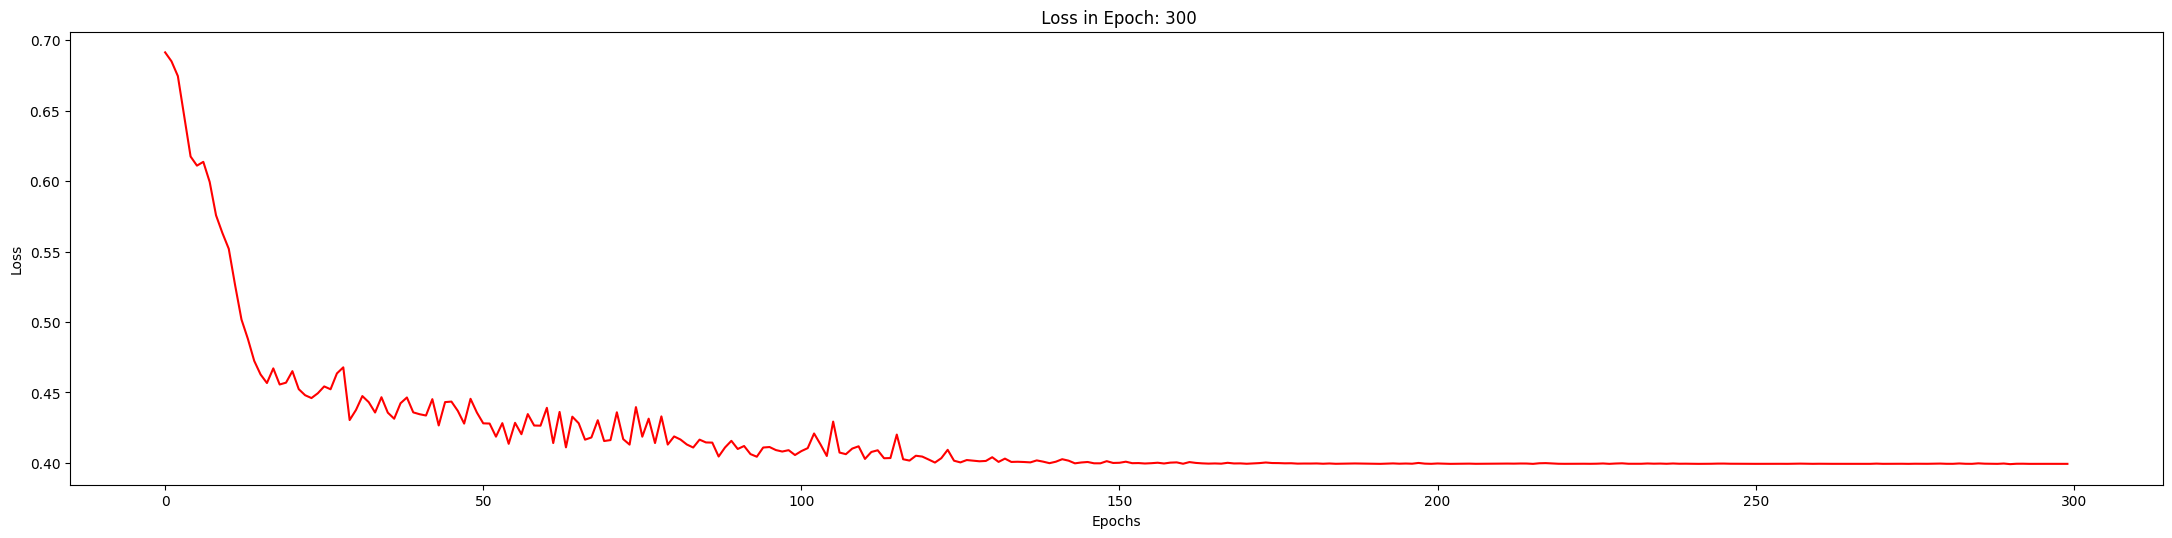

In [20]:
EPOCHS = 300
load_index = 0

train(EPOCHS, load_index)

In [21]:
GNN_Model_test_predicted_labels = []
def GNN_Model_test(test_loader):
    GNN_Model.eval()
    correct = 0
    for batch_of_graphs in test_loader:
        #Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = GNN_Model(batch_of_graphs)
        #GNN_Model_test_pred = soft.argmax(dim=1)

        final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = GNN_Model(batch_of_graphs, None)
        GNN_Model_test_pred = softmaxed_h2.argmax(dim=1)

        GNN_Model_test_predicted_labels.append(GNN_Model_test_pred.tolist()[0])
        correct += int((GNN_Model_test_pred == batch_of_graphs.y).sum())
    return correct / len(test_loader.dataset), GNN_Model_test_predicted_labels

In [22]:
GNN_Model_test_acc, predicted_labels = GNN_Model_test(test_dataloader)
print(f'Test Accuracy: {GNN_Model_test_acc:.4f}')

Test Accuracy: 0.7105


In [19]:
print(GNN_Model)
test_dataloader_example = DataLoader(test_dataset, batch_size=1, shuffle=False)
for batch in test_dataloader_example:
    #Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = GNN_Model(batch)
    final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = GNN_Model(batch, None)
    break
print(softmaxed_h2)
#print(soft)
print(train_dataset[0].x)

DGCNN_Model(
  (gnn_layers): dgcnn_gnn_layers(
    (gnn_layers): Sequential(
      (0): GNN_DGCNN(
        (conv_params): Linear(in_features=7, out_features=32, bias=False)
      )
      (1): GNN_DGCNN(
        (conv_params): Linear(in_features=32, out_features=32, bias=False)
      )
      (2): GNN_DGCNN(
        (conv_params): Linear(in_features=32, out_features=32, bias=False)
      )
      (3): GNN_DGCNN(
        (conv_params): Linear(in_features=32, out_features=7, bias=False)
      )
    )
  )
  (sort_pool): SortPooling()
  (classic_conv): MLP_DGCNN(
    (conv1d_1): Conv1d(1, 16, kernel_size=(2,), stride=(2,), bias=False)
    (maxpool1d): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv1d_2): Conv1d(16, 32, kernel_size=(5,), stride=(1,), bias=False)
    (linear1): Linear(in_features=800, out_features=128, bias=False)
    (linear2): Linear(in_features=128, out_features=2, bias=False)
    (dropout_linear1): Dropout(p=0.5, inplace=False)
  )
)
ten

In [ ]:
def instance_time(test_dataset):
    instance_based_time = []
    GNN_Model.eval()
    correct = 0
    for batched_data in test_dataset:
        start_generation = perf_counter()
        #Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = GNN_Model(batched_data)
        #GNN_test_pred = soft.argmax(dim=1)

        final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = GNN_Model(batched_data, None)
        GNN_Model_test_pred = softmaxed_h2.argmax(dim=1)

        consumed_time = perf_counter() - start_generation
        instance_based_time.append(consumed_time)
    return instance_based_time

In [ ]:
samples_time = instance_time(test_dataset)
print(f'Test Instance based Time: {samples_time}')

Test Instance based Time: [0.004362162999996144, 0.00285883899999817, 0.0017284029999871109, 0.0013766490000080012, 0.0014465659999984837, 0.0012965580000070531, 0.001276840999992146, 0.0012957180000228163, 0.0012586250000197197, 0.0012608049999869309, 0.0012352429999964443, 0.0012959290000083001, 0.0012768459999961124, 0.001254506999998739, 0.0012987899999927777, 0.0013541659999987132, 0.0012581359999899178, 0.001259383000018488, 0.001285105000022213, 0.001310745000012048, 0.0012531719999913093, 0.0013886680000041451, 0.0012969500000110656, 0.001255823999997574, 0.002064197999999351, 0.002160028999981023, 0.0017799109999998564, 0.001328129999990324, 0.0015809390000072199, 0.0012942099999975198, 0.0013642419999939648, 0.0013077540000097088, 0.0012561100000141323, 0.0013143179999985932, 0.0013363919999846985, 0.002002460999989353, 0.0020346240000037596, 0.0021109660000036]


In [ ]:
real_labels = []
for graph in test_dataloader:
    real_labels.append(graph.y.tolist()[0])

In [ ]:
print("predicted_labels: ", predicted_labels)
print("real_labels: ", real_labels)
print("Test Accuracy: ", metrics.accuracy_score(real_labels, predicted_labels))

predicted_labels:  [1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1]
real_labels:  [1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1]
Test Accuracy:  0.7368421052631579


In [ ]:
Auc_Roc = metrics.roc_auc_score(real_labels, predicted_labels)
precision, recall, thresholds = metrics.precision_recall_curve(real_labels, predicted_labels)
Auc_Prc = metrics.auc(y=precision, x=recall)
Acc = metrics.accuracy_score(real_labels, predicted_labels, normalize=True)
Acc2 = metrics.accuracy_score(real_labels, predicted_labels, normalize=False)
print("Auc_Roc: ", Auc_Roc, "Auc_Prc: ", Auc_Prc, "Acc: ", Acc, "Acc2: ", Acc2)

Auc_Roc:  0.7113095238095238 Auc_Prc:  0.8510338345864662 Acc:  0.7105263157894737 Acc2:  27


In [ ]:
import torch
from torch.nn.parameter import Parameter
import numpy as np
from torch import sigmoid

class HardConcrete(torch.nn.Module):

    def __init__(self, beta=1 / 3, gamma=-0.2, zeta=1.0, fix_temp=True, loc_bias=3):
        super(HardConcrete, self).__init__()

        self.temp = beta if fix_temp else Parameter(torch.zeros(1).fill_(beta))
        self.gamma = gamma
        self.zeta = zeta
        self.gamma_zeta_ratio = np.math.log(-gamma / zeta)

        self.loc_bias = loc_bias

    def forward(self, input_element, summarize_penalty=True):
        input_element = input_element + self.loc_bias

        if self.training:
            u = torch.empty_like(input_element).uniform_(1e-6, 1.0-1e-6)

            s = sigmoid((torch.log(u) - torch.log(1 - u) + input_element) / self.temp)

            penalty = sigmoid(input_element - self.temp * self.gamma_zeta_ratio)
            penalty = penalty
        else:
            s = sigmoid(input_element)
            penalty = torch.zeros_like(input_element)

        if summarize_penalty:
            penalty = penalty.mean()

        s = s * (self.zeta - self.gamma) + self.gamma

        clipped_s = self.clip(s)

        if True:
            hard_concrete = (clipped_s > 0.5).float()
            clipped_s = clipped_s + (hard_concrete - clipped_s).detach()

        return clipped_s, penalty

    def clip(self, x, min_val=0, max_val=1):
        return x.clamp(min_val, max_val)

In [ ]:
class MovingAverage:

    window_size = None
    current_value = None
    observations = None
    observation_count = None
    use_window = None

    def __init__(self, window_size=None, use_window=True):
        self.window_size = window_size

        self.current_value = 0
        self.observation_count = 0
        self.use_window = use_window

        if use_window:
            self.observations = [None] * self.window_size

    def register(self, observation):
        if self.use_window:
            current_window_idx = self.observation_count % self.window_size
            insert_value = observation / self.window_size

        if self.use_window and self.observation_count >= self.window_size:
            drop_value = self.observations[current_window_idx]
            self.current_value -= drop_value
            self.current_value += insert_value
        else:
            div_val = self.observation_count + 1
            self.current_value *= self.observation_count
            self.current_value += observation
            self.current_value /= div_val

        if self.use_window:
            self.observations[current_window_idx] = insert_value

        self.observation_count += 1

    def get_value(self):
        return self.current_value

In [ ]:
class LagrangianOptimization:

    min_alpha = None
    max_alpha = None
    original_optimizer = None
    batch_size_multiplier = None
    update_counter = 0

    def __init__(self, original_optimizer, init_alpha=0.55, min_alpha=-2, max_alpha=30, alpha_optimizer_lr=1e-2, batch_size_multiplier=None):
        self.min_alpha = min_alpha
        self.max_alpha = max_alpha
        self.batch_size_multiplier = batch_size_multiplier
        self.update_counter = 0

        self.alpha = torch.tensor(init_alpha, requires_grad=True)
        self.optimizer_alpha = torch.optim.RMSprop([self.alpha], lr=alpha_optimizer_lr, centered=True)
        self.original_optimizer = original_optimizer

    def update(self, f, g):
        """
        L(x, lambda) = f(x) + lambda g(x)
        :param f_function:
        :param g_function:
        :return:
        """

        if self.batch_size_multiplier is not None and self.batch_size_multiplier > 1:
            if self.update_counter % self.batch_size_multiplier == 0:
                self.original_optimizer.zero_grad()
                self.optimizer_alpha.zero_grad()

            self.update_counter += 1
        else:
            self.original_optimizer.zero_grad()
            self.optimizer_alpha.zero_grad()

        loss = f + torch.nn.functional.softplus(self.alpha) * g
        loss.backward(retain_graph=True)

        if self.batch_size_multiplier is not None and self.batch_size_multiplier > 1:
            if self.update_counter % self.batch_size_multiplier == 0:
                self.original_optimizer.step()
                self.alpha.grad *= -1
                self.optimizer_alpha.step()
        else:
            self.original_optimizer.step()
            self.alpha.grad *= -1
            self.optimizer_alpha.step()

        if self.alpha.item() < -2:
            self.alpha.data = torch.full_like(self.alpha.data, -2)
        elif self.alpha.item() > 30:
            self.alpha.data = torch.full_like(self.alpha.data, 30)

In [25]:

class GraphMask:
    def __init__(self, Model_Name, classifier_load_index, explainer_save_index, Exp_Epoch, Exp_lr, explainer_hid_dim, input_dim, hid_dim, output_dim):

        ######################              MAIN
        self.beta = 1 / 3
        self.gamma = -0.2
        self.zeta = 1.0
        self.fix_temp = True
        self.loc_bias=3
        self.penalty_scaling = 1
        self.allowance = 0.03
        self.max_allowed_performance_diff = 0.05
        self.temp = self.beta if self.fix_temp else Parameter(torch.zeros(1).fill_(self.beta))
        self.gamma_zeta_ratio = np.math.log(-self.gamma / self.zeta)
        ###########
        self.GNN_Model = self.load_model(Task_name=Task_name, Explainability_name=Explainability_name, Model_Name=Model_Name, classifier_load_index=classifier_load_index, input_dim=input_dim, hid_dim=hid_dim, output_dim=output_dim)
        self.input_dim = input_dim
        self.explainer_lr = Exp_lr
        self.explainer_hid_dim = explainer_hid_dim
        self.graphmask_mlp = Sequential(Linear(self.input_dim * 2, self.explainer_hid_dim), LayerNorm(self.explainer_hid_dim), ReLU(), Linear(self.explainer_hid_dim, 1))
        self.graphmask_mlp_optimizer = torch.optim.Adam(self.graphmask_mlp.parameters(), lr=self.explainer_lr)
        self.explainer_epochs = Exp_Epoch
        #self.criterion = torch.nn.CrossEntropyLoss()
        #self.criterion = F.binary_cross_entropy_with_logits
        self.criterion = nn.L1Loss()
        self.explainer_save_index = explainer_save_index
        self.Explainability_name = 'GraphMask'
        self.Task_name = 'Graph Classification'
        self.Model_Name = Model_Name

        self.baseline = torch.FloatTensor(1)
        bl_stdv = 1. / math.sqrt(1)
        self.baseline.uniform_(-bl_stdv, bl_stdv)
        self.baseline = torch.nn.Parameter(self.baseline, requires_grad=True)


        ###############.      Lagrangian Optimization
        self.min_alpha = -2
        self.max_alpha = 30
        self.update_counter = 0
        self.init_alpha = 0.55
        self.alpha_optimizer_lr=1e-2
        self.alpha = torch.tensor(self.init_alpha, requires_grad=True)
        self.optimizer_alpha = torch.optim.RMSprop([self.alpha], lr=self.alpha_optimizer_lr, centered=True)
        self.update_counter = 0





    def load_model(self, Task_name, Explainability_name, Model_Name, classifier_load_index, input_dim, hid_dim, output_dim):

        if classifier_load_index != 0:
            GNN_Model, optimizer, classifier_load_index = self.loading_config(Task_name=Task_name, Explainability_name=Explainability_name,
                                                                              Model_Name=Model_Name, classifier_load_index=classifier_load_index,
                                                                              input_dim=input_dim, hid_dim=hid_dim, output_dim=output_dim)
            return GNN_Model
        else:
            #GNN_Model = Graph_Network.GCN_plus_GAP(model_name=Model_Name, model_level='graph', input_dim=input_dim, hidden_dim=hid_dim, output_dim=output_dim,
            #                                       num_hid_layers=2, Bias=True, act_fun='eLu', Weight_Initializer=1, dropout_rate=0.1)

            GNN_Model = dgcnn_model.DGCNN_Model(GNN_layers=[32, 32, 32, 7], num_classes=2, mlp_act_fun='ReLu', dgcnn_act_fun='tanh', mlp_dropout_rate=0.5,
                                                Weight_Initializer=3, Bias=False, dgcnn_k=17, node_feat_size=7, hid_channels=[16,32], conv1d_kernels=[2,5],
                                                ffn_layer_size=128, strides=[2,1])
            return GNN_Model

    def loading_config(self, Task_name, Explainability_name, Model_Name, classifier_load_index, input_dim, hid_dim, output_dim):
        #GNN_Model = Graph_Network.GCN_plus_GAP(model_name=Model_Name, model_level='graph', input_dim=input_dim, hidden_dim=hid_dim, output_dim=output_dim, num_hid_layers=2, Bias=True, act_fun='eLu', Weight_Initializer=1, dropout_rate=0.1)
        GNN_Model = dgcnn_model.DGCNN_Model(GNN_layers=[32, 32, 32, 7], num_classes=2, mlp_act_fun='ReLu', dgcnn_act_fun='tanh', mlp_dropout_rate=0.5,
                                            Weight_Initializer=3, Bias=False, dgcnn_k=17, node_feat_size=7, hid_channels=[16,32], conv1d_kernels=[2,5],
                                            ffn_layer_size=128, strides=[2,1])
        optimizer = torch.optim.Adam(params=GNN_Model.parameters(), lr=0.001, weight_decay=1e-6)
        checkpoint = torch.load("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + File_Name + str(classifier_load_index)+".pt")
        GNN_Model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch = checkpoint['epoch']
        loss = checkpoint['loss']

        return GNN_Model, optimizer, epoch


    def explainer_loss(self, By_Perturbation_predicted_label, predicted_label):
        loss_per_epoch = self.criterion(By_Perturbation_predicted_label, predicted_label)
        return loss_per_epoch

    def binary_concrete(self, explaier_outputs, temperature, summarize_penalty=True):
        explaier_outputs = explaier_outputs + self.loc_bias
        if self.ExTrain_or_ExTest == 'train':
            u = torch.empty_like(explaier_outputs).uniform_(1e-6, 1.0-1e-6)
            s = sigmoid((torch.log(u) - torch.log(1 - u) + explaier_outputs) / temperature)
            penalty = sigmoid(explaier_outputs - temperature * self.gamma_zeta_ratio)
        else:
            s = sigmoid(explaier_outputs)
            penalty = torch.zeros_like(explaier_outputs)

        if summarize_penalty:
            penalty = penalty.mean()

        s = s * (self.zeta - self.gamma) + self.gamma
        clipped_s = s.clamp(min=0, max=1)

        hard_concrete = (clipped_s > 0.5).float()
        clipped_s = clipped_s + (hard_concrete - clipped_s).detach()
        clipped_s = clipped_s.squeeze(dim=-1)

        return clipped_s, penalty

    def lagrangian_optimization_update(self, f, g, batch_size_multiplier):

        if batch_size_multiplier is not None and batch_size_multiplier > 1:
            if self.update_counter % batch_size_multiplier == 0:
                self.graphmask_mlp_optimizer.zero_grad()
                self.optimizer_alpha.zero_grad()

            self.update_counter += 1
        else:
            self.graphmask_mlp_optimizer.zero_grad()
            self.optimizer_alpha.zero_grad()

        loss = f + torch.nn.functional.softplus(self.alpha) * g
        loss.backward(retain_graph=True)

        if batch_size_multiplier is not None and batch_size_multiplier > 1:
            if self.update_counter % batch_size_multiplier == 0:
                self.graphmask_mlp_optimizer.step()
                self.alpha.grad *= -1
                self.optimizer_alpha.step()
        else:
            self.graphmask_mlp_optimizer.step()
            self.alpha.grad *= -1
            self.optimizer_alpha.step()

        if self.alpha.item() < -2:
            self.alpha.data = torch.full_like(self.alpha.data, -2)
        elif self.alpha.item() > 30:
            self.alpha.data = torch.full_like(self.alpha.data, 30)

    def train_step_explainer(self, merged_embeddings_list_batchs, GNN_Model, your_dataset, GNN_Model_preds_NOT_MASKED, target_class):

        #lagrangian_optimization = LagrangianOptimization(self.graphmask_mlp_optimizer, batch_size_multiplier=your_dataset.batch_size)
        self.graphmask_mlp.train()
        self.graphmask_mlp.zero_grad()
        for batched_merged_embeddings, batched_preds_NOT_MASKED, batched_graphs in zip(merged_embeddings_list_batchs, GNN_Model_preds_NOT_MASKED, your_dataset):
            explaier_outputs = self.graphmask_mlp(batched_merged_embeddings).view(-1)

            edge_mask, sparsity_penalty = self.binary_concrete(explaier_outputs, self.temp)
            #print("edge_mask: ", edge_mask)
            #print("penalty: ", sparsity_penalty)
            #print("baseline: ", baseline)
            importance_indices = edge_mask == 0
            edge_mask[importance_indices] = self.baseline
            #print(edge_mask.size(), len(batched_graphs.edge_index[0]))
            self.apply_masks(GNN_Model, edge_mask, batched_graphs.edge_index, apply_sigmoid=True)

            #Output_of_Hidden_Layers_MASKED, pooling_layer_output_MASKED, ffn_output_MASKED, soft_MASKED = GNN_Model(batched_graphs)
            #print("batched_preds_NOT_MASKED: ", batched_preds_NOT_MASKED, "   ", "batched_preds_NOT_MASKED.argmax(dim=1): ", batched_preds_NOT_MASKED.argmax(dim=1))
            final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, soft_MASKED = GNN_Model(batched_graphs, edge_mask.tolist())

            if target_class == "correct":
                batch_loss = self.explainer_loss(soft_MASKED.argmax(dim=1).to(torch.float32), batched_preds_NOT_MASKED.argmax(dim=1).to(torch.float32))
            else:
                batch_loss = self.explainer_loss(soft_MASKED.argmin(dim=1).to(torch.float32), batched_preds_NOT_MASKED.argmin(dim=1).to(torch.float32))

            g = torch.relu(batch_loss - self.allowance).mean()
            f = (sparsity_penalty * self.penalty_scaling)

            self.lagrangian_optimization_update(f=f, g=g, batch_size_multiplier=your_dataset.batch_size)

            batch_loss.requires_grad = True
            batch_loss.backward(retain_graph=True)
            self.graphmask_mlp_optimizer.step()

        return edge_mask

    def train_explainer(self, GNN_Model, your_dataset, target_class):
        edge_masks_per_epoch = []
        #self.clear_masks(GNN_Model)
        merged_embeddings_list = self.get_merged_embeddings(GNN_Model, your_dataset)
        GNN_Model_preds_NOT_MASKED = []
        for batch_of_graphs in your_dataset:
            #Output_of_Hidden_Layers_NOT_MASKED, pooling_layer_output_NOT_MASKED, ffn_output_NOT_MASKED, soft_NOT_MASKED = GNN_Model(batch_of_graphs)
            final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, soft_NOT_MASKED = GNN_Model(batch_of_graphs, None)
            GNN_Model_preds_NOT_MASKED.append(soft_NOT_MASKED)

        for epoch in range(self.explainer_epochs):
            print("Epoch: ", epoch)
            edge_mask = self.train_step_explainer(merged_embeddings_list, GNN_Model, your_dataset, GNN_Model_preds_NOT_MASKED, target_class)
            edge_masks_per_epoch.append(edge_mask)

            if (epoch + 1) == self.explainer_save_index:
                torch.save({'epoch': epoch+1, 'model_state_dict': self.graphmask_mlp.state_dict(), 'optimizer_state_dict': self.graphmask_mlp_optimizer.state_dict(), 'baseline_state_dict': self.baseline}, "/content/drive/My Drive/Explainability Methods/" + str(self.Explainability_name) + " on " + str(self.Task_name) + "/Model/" + str(self.Model_Name) + "_Model_classifier_GraphMask_MLP_" + str(epoch + 1) + "_epochs_" + str(target_class) + ".pt")
                #torch.save({'epoch': epoch+1, 'baseline_state_dict': self.baseline}, "/content/drive/My Drive/Explainability Methods/" + str(self.Explainability_name) + " on " + str(self.Task_name) + "/Model/" + str(self.Model_Name) + "_BaseLine_Model_classifier_GraphMask_MLP_" + str(epoch + 1) + "_epochs_" + str(target_class) + ".py")
        self.clear_masks(GNN_Model)

    def test_explainer(self, GNN_Model, your_dataset, graphmask_mlp):
        predicted_labels_MASKED = []
        merged_embeddings_list_batchs = self.get_merged_embeddings(GNN_Model, your_dataset)
        GNN_Model_preds_NOT_MASKED = []
        graphmask_mlp.eval()
        for batch_of_graphs in your_dataset:
            #Output_of_Hidden_Layers_NOT_MASKED, pooling_layer_output_NOT_MASKED, ffn_output_NOT_MASKED, soft_NOT_MASKED = GNN_Model(batch_of_graphs)
            final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, soft_NOT_MASKED = GNN_Model(batch_of_graphs, None)
            GNN_Model_preds_NOT_MASKED.append(soft_NOT_MASKED)

        for batched_merged_embeddings, batched_preds_NOT_MASKED, batched_graphs in zip(merged_embeddings_list_batchs, GNN_Model_preds_NOT_MASKED, your_dataset):
            explaier_outputs = graphmask_mlp(batched_merged_embeddings).view(-1)

            edge_mask, sparsity_penalty = self.binary_concrete(explaier_outputs, self.temp)

            importance_indices = edge_mask == 0
            edge_mask[importance_indices] = self.baseline

            self.apply_masks(GNN_Model, edge_mask, batched_graphs.edge_index, apply_sigmoid=True)

            #Output_of_Hidden_Layers_MASKED, pooling_layer_output_MASKED, ffn_output_MASKED, soft_MASKED = GNN_Model(batched_graphs)
            final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, soft_MASKED = GNN_Model(batched_graphs, edge_mask.tolist())
            #print(soft_MASKED.argmax(dim=1))
            predicted_labels_MASKED.append(torch.squeeze(soft_MASKED.argmax(dim=1)).tolist())
        self.clear_masks(GNN_Model)
        return predicted_labels_MASKED

    def apply_masks(self, model, mask, edge_index, apply_sigmoid):
        loop_mask = edge_index[0] != edge_index[1]

        for module in model.modules():
            if isinstance(module, MessagePassing):

                if (not isinstance(mask, Parameter)
                        and '_edge_mask' in module._parameters):
                    mask = Parameter(mask)

                module.explain = True
                module._edge_mask = mask
                module._loop_mask = loop_mask
                module._apply_sigmoid = apply_sigmoid
                #print(module._edge_mask)

    def clear_masks(self, model):

        for module in model.modules():
            if isinstance(module, MessagePassing):
                module.explain = False
                module._edge_mask = None
                module._loop_mask = None
                module._apply_sigmoid = True
        return module

    def get_merged_embeddings(self, GNN_Model, your_dataset):
        new_embeddings_list = []
        merged_embeddings_list = []
        for batched_graphs in your_dataset:
            new_graph_by_masks = deepcopy(batched_graphs.detach())

            new_embeddings, GNN_Model_explain_predicted_labels = self.get_hopped_embeddings(GNN_Model, new_graph_by_masks)
            new_embeddings_list.append(new_embeddings)

            merged_embeddings = self.edge_embeddings(new_embeddings, new_graph_by_masks.edge_index)
            merged_embeddings_list.append(merged_embeddings)

        return merged_embeddings_list


    def edge_embeddings(self, embedding, edge_index):
        Zs = [embedding[edge_index[0]], embedding[edge_index[1]]]
        return torch.cat(Zs, dim=-1)

    def get_hopped_embeddings(self, GNN_Model, batch_of_graphs):
        GNN_Model.eval()
        #Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = GNN_Model(batch_of_graphs)
        #GNN_Model_test_pred = soft.argmax(dim=1)
        final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = GNN_Model(batch_of_graphs, None)
        GNN_Model_test_pred = softmaxed_h2.argmax(dim=1)

        #return Output_of_Hidden_Layers[-1], GNN_Model_test_pred
        return final_GNN_layer_output, GNN_Model_test_pred


    def load_explainer_mlp(self, Exp_Load_index, target_class):
        graphmask_mlp = Sequential(Linear(self.input_dim * 2, self.explainer_hid_dim), LayerNorm(self.explainer_hid_dim), ReLU(), Linear(self.explainer_hid_dim, 1))
        graphmask_mlp_optimizer = torch.optim.Adam(self.graphmask_mlp.parameters(), lr=self.explainer_lr)
        checkpoint = torch.load("/content/drive/My Drive/Explainability Methods/" + str(self.Explainability_name) + " on " + str(self.Task_name) + "/Model/" + str(self.Model_Name) + "_Model_classifier_GraphMask_MLP_" + str(Exp_Load_index)+"_epochs_" + str(target_class) + ".pt")
        graphmask_mlp.load_state_dict(checkpoint['model_state_dict'])
        graphmask_mlp_optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        baseline = checkpoint['baseline_state_dict']
        print("BaseLine: ", target_class, "   ", baseline)



        #py_path2 = "/content/drive/My Drive/Explainability Methods/GraphMask on Graph Classification/Model/"
        #sys.path.insert(0,py_path2)

        #import GCN_plus_GAP_BaseLine_Model_classifier_GraphMask_MLP_100_epochs_correct as basline_file
        #x = basline_file['baseline_state_dict']
        #baseline = torch.FloatTensor(1)
        #bl_stdv = 1. / math.sqrt(1)
        #baseline.uniform_(-bl_stdv, bl_stdv)
        #baseline = torch.nn.Parameter(baseline, requires_grad=True)
        #baseline.load()

        return graphmask_mlp, graphmask_mlp_optimizer, baseline

    def __call__(self, ExTrain_or_ExTest,  Exp_Load_index, your_dataset, target_class):
        self.ExTrain_or_ExTest = ExTrain_or_ExTest
        if ExTrain_or_ExTest == "train":
            t1 = perf_counter()
            self.train_explainer(self.GNN_Model, your_dataset, target_class)
            t2 = perf_counter()
            print("AVG. Explaining Time: ", (t2 - t1) / self.explainer_epochs)#len(your_dataset))
        elif ExTrain_or_ExTest == "test":
            graphmask_mlp, graphmask_mlp_optimizer, baseline = self.load_explainer_mlp(Exp_Load_index=Exp_Load_index, target_class="correct")
            predicted_labels = self.test_explainer(self.GNN_Model, your_dataset, graphmask_mlp)
            print("  correct predicted_labels: ", predicted_labels)

            graphmask_mlp, graphmask_mlp_optimizer, baseline = self.load_explainer_mlp(Exp_Load_index=Exp_Load_index, target_class="incorrect")
            predicted_labels = self.test_explainer(self.GNN_Model, your_dataset, graphmask_mlp)
            print("incorrect predicted_labels: ", predicted_labels)
        else:
            print("recheck")


target_class = 'correct'
ExTrain_or_ExTest = 'train'
if ExTrain_or_ExTest == 'train':
    your_datasets = train_dataset
elif ExTrain_or_ExTest == 'test':
    your_datasets = test_dataloader
t1_start = perf_counter()
explainer_epochs = 200
EXP = GraphMask(Model_Name="DGCNN", classifier_load_index=200, explainer_save_index=explainer_epochs, Exp_Epoch=explainer_epochs,
                Exp_lr=0.001, explainer_hid_dim=7, input_dim=len(dataset[0].x[0]), hid_dim=7, output_dim=2)
EXP(ExTrain_or_ExTest=ExTrain_or_ExTest, Exp_Load_index=explainer_epochs, your_dataset=your_datasets, target_class=target_class)
t2_start = perf_counter()
attribution_time = (t2_start - t1_start)/explainer_epochs
print("attribution_time: ", attribution_time)
#print("Before Training Explainer: ", self.GNN_Model.GConvs[0].lin.weight)
#print("After Training Explainer: ", self.GNN_Model.GConvs[0].lin.weight)
#t1_start = perf_counter()
#EXP(ExTrain_or_ExTest=ExTrain_or_ExTest, Exp_Load_index=100, your_dataset=test_dataloader, target_class="correct")
#EXP(ExTrain_or_ExTest=ExTrain_or_ExTest, Exp_Load_index=100, your_dataset=test_dataloader, target_class="incorrect")
#t2_start = perf_counter()
#print("duration: ", (t2_start - t1_start)/len(test_dataset))

tanh is Selected.
tanh is Selected.


<ipython-input-25-6052beaddc2f>:14: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  self.gamma_zeta_ratio = np.math.log(-self.gamma / self.zeta)


IndexError: index 1 is out of bounds for dimension 0 with size 1

In [ ]:
Model_Load_iNdex = 300
Explainer_Load_iNdex = 200

In [ ]:
#GNN_Model = Graph_Network.GCN_plus_GAP(model_name=Model_Name, model_level='graph', input_dim=7, hidden_dim=7, output_dim=2, num_hid_layers=2, Bias=True, act_fun='eLu', Weight_Initializer=1, dropout_rate=0.1)
GNN_Model = dgcnn_model.DGCNN_Model(GNN_layers=[32, 32, 32, 7], num_classes=2, mlp_act_fun='ReLu', dgcnn_act_fun='tanh', mlp_dropout_rate=0.5,
                                    Weight_Initializer=3, Bias=False, dgcnn_k=17, node_feat_size=7, hid_channels=[16,32], conv1d_kernels=[2,5],
                                    ffn_layer_size=128, strides=[2,1])
optimizer = torch.optim.Adam(params=GNN_Model.parameters(), lr=0.001, weight_decay=1e-6)
checkpoint = torch.load("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + str(File_Name) + str(Model_Load_iNdex)+".pt")
GNN_Model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

tanh is Selected.


In [ ]:
graphmask_exp_mlp = Sequential(Linear(7 * 2, 7), LayerNorm(7), ReLU(), Linear(7, 1))
graphmask_exp_mlp_optimizer = torch.optim.Adam(graphmask_exp_mlp.parameters(), lr=0.001)
checkpoint = torch.load("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + str(Model_Name) + "_Model_classifier_GraphMask_MLP_" + str(Explainer_Load_iNdex)+"_epochs_" + str("correct") + ".pt")
graphmask_exp_mlp.load_state_dict(checkpoint['model_state_dict'])
graphmask_exp_mlp_optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
baseline_correct = checkpoint['baseline_state_dict']

In [ ]:
print(graphmask_exp_mlp[0].weight)

Parameter containing:
tensor([[-0.1362, -0.0445,  0.3231, -0.0291,  0.2143, -0.3263,  0.1660, -0.2002,
         -0.0461,  0.2032,  0.0139, -0.1067, -0.0749, -0.0479],
        [ 0.1298,  0.2242, -0.1682, -0.0413, -0.0960, -0.0870,  0.2212,  0.0321,
          0.0310, -0.0368,  0.0664, -0.1610, -0.0372,  0.1253],
        [ 0.1671,  0.3861, -0.1211,  0.1082,  0.1049, -0.0040, -0.0853,  0.3405,
          0.2618,  0.0107,  0.1416,  0.0952, -0.0879,  0.0231],
        [ 0.0797,  0.0672, -0.0826, -0.2236, -0.3393, -0.1116, -0.0256, -0.0115,
         -0.0162,  0.0697,  0.2088, -0.2316,  0.0030, -0.1361],
        [-0.0804,  0.0915,  0.1326,  0.1953, -0.2140, -0.0630, -0.2487,  0.2262,
          0.0011, -0.2061, -0.0669,  0.1313, -0.0624, -0.0347],
        [-0.2252,  0.1849, -0.2838,  0.1878, -0.1364, -0.1287,  0.0929,  0.2438,
         -0.0915, -0.0571, -0.2350, -0.1493,  0.0446, -0.1645],
        [ 0.1072,  0.2876, -0.0744,  0.0052, -0.1020, -0.0013, -0.0710,  0.1818,
         -0.1773,  0.0862, 

In [ ]:
graphmask_exp_mlp_incorrect = Sequential(Linear(7 * 2, 7), LayerNorm(7), ReLU(), Linear(7, 1))
graphmask_exp_mlp_optimizer_incorrect = torch.optim.Adam(graphmask_exp_mlp.parameters(), lr=0.001)
checkpoint = torch.load("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + str(Model_Name) + "_Model_classifier_GraphMask_MLP_" + str(Explainer_Load_iNdex)+"_epochs_" + str("incorrect") + ".pt")
graphmask_exp_mlp_incorrect.load_state_dict(checkpoint['model_state_dict'])
graphmask_exp_mlp_optimizer_incorrect.load_state_dict(checkpoint['optimizer_state_dict'])
baseline_incorrect = checkpoint['baseline_state_dict']

In [ ]:
print(graphmask_exp_mlp_incorrect[0].weight)

Parameter containing:
tensor([[-0.1981,  0.1282, -0.1450, -0.3239, -0.0166, -0.2236,  0.1704, -0.2815,
          0.0721,  0.1385, -0.1432,  0.2004, -0.3525,  0.0587],
        [-0.1087, -0.2742,  0.0441, -0.3906,  0.2644, -0.2453, -0.0053, -0.1634,
         -0.2009,  0.2580, -0.2204,  0.0588, -0.4775,  0.1985],
        [-0.0785,  0.2645,  0.0156, -0.0622, -0.3213,  0.1249, -0.1541,  0.3152,
          0.1973, -0.0058,  0.2344,  0.1753,  0.0659, -0.0678],
        [-0.2335, -0.2110, -0.0406,  0.1462, -0.1652, -0.0464, -0.1761,  0.1244,
          0.1337, -0.0488,  0.1500,  0.0293, -0.1233,  0.1443],
        [ 0.0486,  0.0239, -0.1158,  0.0609,  0.0609,  0.0160, -0.1408, -0.0987,
          0.2183, -0.2325,  0.0924,  0.1023,  0.0021,  0.0885],
        [-0.0364, -0.0435,  0.0099,  0.0071, -0.1139,  0.1504, -0.0872, -0.0864,
         -0.2670, -0.1525, -0.1783,  0.2480, -0.2153,  0.0676],
        [-0.0648,  0.0154, -0.1910,  0.3867,  0.0189,  0.3277, -0.3108, -0.1133,
          0.2727, -0.0145, 

## **Evaluations**

In [ ]:
beta = 1 / 3
gamma = -0.2
zeta = 1.0
fix_temp = True
loc_bias=3
penalty_scaling = 1
allowance = 0.03
max_allowed_performance_diff = 0.05
temp = beta if fix_temp else Parameter(torch.zeros(1).fill_(beta))
gamma_zeta_ratio = np.math.log(-gamma / zeta)
min_alpha = -2
max_alpha = 30
update_counter = 0
init_alpha = 0.55
alpha_optimizer_lr=1e-2
alpha = torch.tensor(init_alpha, requires_grad=True)
optimizer_alpha = torch.optim.RMSprop([alpha], lr=alpha_optimizer_lr, centered=True)
update_counter = 0
sm = torch.nn.Softmax(dim=0)

In [ ]:
def Compute_ROC_AUC(your_model, your_dataset, masked):
    preds = []
    reals = []
    if masked == False:
        your_model.eval()
        for batched_data in your_dataset:
            #Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = your_model(batched_data)
            #preds.append(soft.cpu().detach())

            final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = your_model(batched_data, None)
            preds.append(softmaxed_h2.cpu().detach())
    else:

        your_model.eval()
        for batched_data, edge_mask in zip(your_dataset, masked):
            #your_model = apply_masks(your_model, edge_mask, batched_data.edge_index, apply_sigmoid=False)
            #Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = your_model(batched_data)
            #preds.append(soft.cpu().detach())

            final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = your_model(batched_data, edge_mask.tolist())
            preds.append(softmaxed_h2.cpu().detach())

        clear_masks(your_model)



    for i, batched_graph in enumerate(your_dataset):
        reals.append(batched_graph.y.cpu().detach().tolist())
    #preds = torch.cat(preds).cpu().numpy()
    #preds = preds[:, 1]
    preds = torch.cat(preds)
    #print(preds)
    preds, max_idxs = torch.max(preds[:], dim=1)
    #print(preds)
    roc_auc = metrics.roc_auc_score(reals, preds, average='macro')
    return roc_auc

def get_hopped_embeddings(GNN_Model, batch_of_graphs):
    GNN_Model.eval()
    #Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = GNN_Model(batch_of_graphs)
    #GNN_Model_test_pred = soft.argmax(dim=1)
    final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = GNN_Model(batch_of_graphs, None)
    GNN_Model_test_pred = softmaxed_h2.argmax(dim=1)
    #return Output_of_Hidden_Layers[-1], GNN_Model_test_pred
    return final_GNN_layer_output, GNN_Model_test_pred

def edge_embeddings(embedding, edge_index):
    Zs = [embedding[edge_index[0]], embedding[edge_index[1]]]
    return torch.cat(Zs, dim=-1)

def get_merged_embeddings(GNN_Model, your_dataset):
    new_embeddings_list = []
    merged_embeddings_list = []
    for batched_graphs in your_dataset:
        new_graph_by_masks = deepcopy(batched_graphs.detach())

        new_embeddings, GNN_Model_explain_predicted_labels = get_hopped_embeddings(GNN_Model, new_graph_by_masks)
        new_embeddings_list.append(new_embeddings)

        merged_embeddings = edge_embeddings(new_embeddings, new_graph_by_masks.edge_index)
        merged_embeddings_list.append(merged_embeddings)

    return merged_embeddings_list

def binary_concrete(explaier_outputs, temperature, summarize_penalty=True):
    ExTrain_or_ExTest = 'test'
    explaier_outputs = explaier_outputs + loc_bias
    if ExTrain_or_ExTest == 'train':
        u = torch.empty_like(explaier_outputs).uniform_(1e-6, 1.0-1e-6)
        s = sigmoid((torch.log(u) - torch.log(1 - u) + explaier_outputs) / temperature)
        penalty = sigmoid(explaier_outputs - temperature * gamma_zeta_ratio)
    else:
        s = sigmoid(explaier_outputs)
        penalty = torch.zeros_like(explaier_outputs)

    if summarize_penalty:
        penalty = penalty.mean()

    s = s * (zeta - gamma) + gamma
    clipped_s = s.clamp(min=0, max=1)

    hard_concrete = (clipped_s > 0.5).float()
    clipped_s = clipped_s + (hard_concrete - clipped_s).detach()
    clipped_s = clipped_s.squeeze(dim=-1)

    return clipped_s, penalty

def apply_masks(model, mask, edge_index, apply_sigmoid):
    loop_mask = edge_index[0] != edge_index[1]

    for module in model.modules():
        if isinstance(module, MessagePassing):

            if (not isinstance(mask, Parameter)
                    and '_edge_mask' in module._parameters):
                mask = Parameter(mask)

            module.explain = True
            module._edge_mask = mask
            module._loop_mask = loop_mask
            module._apply_sigmoid = apply_sigmoid
            #print(module._edge_mask)
    return model

def clear_masks(model):

    for module in model.modules():
        if isinstance(module, MessagePassing):
            module.explain = False
            module._edge_mask = None
            module._loop_mask = None
            module._apply_sigmoid = True
    return module

def normalize_scores(Edge_Masks_original):
    graphs=[]
    for graph_masks in Edge_Masks_original:
        temp = []
        for edge_mask in graph_masks:
            #print((edge_mask - min(graph_masks)) * 100)/((max(graph_masks) - min(graph_masks)))
            temp.append((edge_mask - min(graph_masks)) * 100/(max(graph_masks) - min(graph_masks)))
        graphs.append(torch.stack(temp))
    return graphs

def standardize_scores(Edge_Masks_original):
    graphs=[]
    for graph_masks in Edge_Masks_original:
        temp = []
        for edge_mask in graph_masks:
            #print((edge_mask - min(graph_masks)) * 100)/((max(graph_masks) - min(graph_masks)))
            temp.append(edge_mask/max(graph_masks))
        graphs.append(torch.stack(temp))
    return graphs

def test_explainer(GNN_Model, your_dataset, graphmask_mlp, baseline_class_dependent):
    Edge_Mask = []
    Edge_Masks_original = []
    predicted_labels_MASKED = []
    merged_embeddings_list_batchs = get_merged_embeddings(GNN_Model, your_dataset)
    GNN_Model_preds_NOT_MASKED = []
    graphmask_mlp.eval()
    for batch_of_graphs in your_dataset:
        final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, soft_NOT_MASKED = GNN_Model(batch_of_graphs, None)
        GNN_Model_preds_NOT_MASKED.append(soft_NOT_MASKED)

    for batched_merged_embeddings, batched_preds_NOT_MASKED, batched_graphs in zip(merged_embeddings_list_batchs, GNN_Model_preds_NOT_MASKED, your_dataset):
        explaier_outputs = graphmask_mlp(batched_merged_embeddings).view(-1)
        #print("explaier_outputs: ", explaier_outputs)
        #normalized_scores = normalize_scores(explaier_outputs)
        #print("normalized_scores: ", normalized_scores)
        #standardized_scores = standardize_scores(normalized_scores)
        #print("standardized_scores: ", standardized_scores)

        #edge_mask, sparsity_penalty = binary_concrete(explaier_outputs, temp)
        #Edge_Masks_original.append(sm(explaier_outputs))

        #importance_indices = explaier_outputs == 0
        #explaier_outputs[importance_indices] = baseline_class_dependent
        Edge_Mask.append(sm(explaier_outputs))

        #final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, soft_MASKED = GNN_Model(batch_of_graphs, edge_mask.tolist())

        #print(soft_MASKED.argmax(dim=1))
        #predicted_labels_MASKED.append(torch.squeeze(soft_MASKED.argmax(dim=1)).tolist())
    #clear_masks(GNN_Model)
    #print("Edge_Mask: ", Edge_Mask)
    normalized_scores = normalize_scores(Edge_Mask)
    #print("normalized_scores: ", normalized_scores)
    standardized_scores = standardize_scores(normalized_scores)
    #print("standardized_scores: ", standardized_scores)
    return standardized_scores

def drop_important_nodes(your_dataset, importance_threshold):
    attribution_scores = []
    Edge_Masks_Dropped = test_explainer(GNN_Model, your_dataset, graphmask_exp_mlp, baseline_correct)

    Edge_Masks_original = []
    for tensor in Edge_Masks_Dropped:
        Edge_Masks_original.append(deepcopy(tensor.detach()))
    #print("edge masks: ",len(Edge_Masks))
    for edge_mask in Edge_Masks_Dropped:
        #print("edge_mask: ", edge_mask)
        importance_indices = edge_mask > importance_threshold * (max(edge_mask) - min(edge_mask))
        edge_mask[importance_indices] = 0
        #print("edge_mask updated: ", edge_mask)
        #break
    #print("original Edge_masks: ", Edge_Masks_original.size)
    #print("dropped important Edge_masks: ", Edge_Masks_Dropped.size)

    return Edge_Masks_original, Edge_Masks_Dropped

def Fidelity_computation(your_model, your_dataset, importance_threshold):

    auc_roc_before_droping_important_nodes = Compute_ROC_AUC(your_model, your_dataset, False)
    print("auc_roc_before_droping_important_nodes: ", auc_roc_before_droping_important_nodes)


    Edge_Masks_original, Edge_Masks_Dropped = drop_important_nodes(your_dataset, importance_threshold)
    #print("Edge_Masks_Dropped: ", Edge_Masks_Dropped)


    auc_roc_after_droping_important_nodes = Compute_ROC_AUC(your_model, your_dataset, Edge_Masks_Dropped)
    print("auc_roc_after_droping_important_nodes: ", auc_roc_after_droping_important_nodes)


    return auc_roc_before_droping_important_nodes-auc_roc_after_droping_important_nodes







In [ ]:
edge_mask_correct = test_explainer(GNN_Model, test_dataloader, graphmask_exp_mlp, baseline_correct)
edge_mask_incorrect = test_explainer(GNN_Model, test_dataloader, graphmask_exp_mlp_incorrect, baseline_incorrect)

In [ ]:
#print(correct_masks)
class0_fid=[]
class1_fid=[]

class0_crs=[]
class1_crs=[]

class0_spr=[]
class1_spr=[]
for c_mask, inc_mask in zip(edge_mask_correct, edge_mask_incorrect):
    #print(c_mask.tolist())
    #print(inc_mask.tolist())
    class0_fid.append(c_mask)
    class1_fid.append(inc_mask)
    class0_crs.append(c_mask.tolist())
    class1_crs.append(inc_mask.tolist())
    class0_spr.append(c_mask.tolist())
    class1_spr.append(inc_mask.tolist())

In [ ]:
import sys
from importlib import reload
py_path = '/content/drive/MyDrive/Explainability Methods/Evaluation of Explainability Methods/Script/'
sys.path.insert(0,py_path)
import evaluation_of_xmethods_fidelity_plus as eval_xai_fid_plus
eval_xai_fid_plus = reload(eval_xai_fid_plus)

In [ ]:
fid_xmethod_example_2 = eval_xai_fid_plus.evalaution_of_xmethods_fidelity_plus(a_trained_model=GNN_Model, test_data=test_dataset)
fid_score2 = fid_xmethod_example_2.my_fidelity(saliency_class0=class0_fid, saliency_class1=class1_fid, importance_threshold=0.5,
                                               style="Edge")
print(fid_score2)

-0.10788690476190482


In [ ]:
import sys
py_path = '/content/drive/MyDrive/Explainability Methods/Evaluation of Explainability Methods/Script/'
sys.path.insert(0,py_path)
import evaluation_of_xmethods_contrastivity as eval_xai_contrastivity
eval_xai_contrastivity = reload(eval_xai_contrastivity)

In [ ]:
contrastivity_xmethod_example = eval_xai_contrastivity.evalaution_of_xmethods_contrastivity(a_trained_model=GNN_Model,
                                                                                            test_data=test_dataset)
contrastivity_score = contrastivity_xmethod_example.my_contrastivity(test_dataset, class0_crs,
                                                                     class1_crs, importance_threshold=0.5,
                                                                     contrast_coeff=1)
print("Contrastivity_Score: ", contrastivity_score)

Contrastivity_Score:  0.5104989448292011


In [ ]:
import sys
py_path = '/content/drive/MyDrive/Explainability Methods/Evaluation of Explainability Methods/Script/'
sys.path.insert(0,py_path)
import evaluation_of_xmethods_sparsity as eval_xai_sparsity
eval_xai_sparsity = reload(eval_xai_sparsity)

In [ ]:
sparsity_xmethod_example = eval_xai_sparsity.evalaution_of_xmethods_sparsity(a_trained_model=GNN_Model, test_data=test_dataset)
sparsity_score = sparsity_xmethod_example.my_sparsity(test_dataset, class0_spr, class1_spr, importance_threshold=0.5)
print("Sparsity_Score: ", sparsity_score)

Sparsity_Score:  0.5962003892738974


In [ ]:
fid_score = Fidelity_computation(GNN_Model, test_dataloader , 0.5, baseline_correct)
print("Fidelity: ", fid_score)

In [ ]:
def binarize_saliency_maps(correct_mask, incorrect_mask, importance_threshold):
    correct_binary_score_list = []
    incorrect_binary_score_list = []

    for edge_mask in correct_mask:
        correct_binary_score = ''
        #print(edge_mask)
        importance_indices = edge_mask > importance_threshold * (max(edge_mask) - min(edge_mask))
        #print(importance_indices)
        #edge_mask[importance_indices] = 0
        for edge in importance_indices:
            if edge:
                correct_binary_score += '1'
            else:
                correct_binary_score += '0'
        correct_binary_score_list.append(correct_binary_score)

    for edge_mask in incorrect_mask:
        #print(edge_mask)
        incorrect_binary_score = ''
        importance_indices = edge_mask > importance_threshold * (max(edge_mask) - min(edge_mask))
        #print(importance_indices)
        #edge_mask[importance_indices] = 0
        for edge in importance_indices:
            if edge:
                incorrect_binary_score += '1'
            else:
                incorrect_binary_score += '0'
        incorrect_binary_score_list.append(incorrect_binary_score)


    return correct_binary_score_list, incorrect_binary_score_list

def hamming_distance(string1, string2):

    distance = 0
    L = len(string1)
    for i in range(L):
        if string1[i] != string2[i]:
            distance += 1
    return distance

def normalize_for_contrastivity(gcam_atts):
    final = []
    for graph in gcam_atts:
        temp = []
        for score in graph:
            temp.append(score*10000000000 - int(score*10000000000))
        final.append(temp)
    return final

def compute_contrastivity(your_model, your_dataset, graphmask_exp_mlp, graphmask_exp_mlp_incorrect, importance_threshold):
    correct_masks = test_explainer(GNN_Model, your_dataset, graphmask_exp_mlp, baseline_correct, importance_threshold)
    incorrect_masks = test_explainer(GNN_Model, your_dataset, graphmask_exp_mlp_incorrect, baseline_incorrect, importance_threshold)
    #print("correct_masks: ", correct_masks)
    #print("incorrect_masks: ", incorrect_masks)
    #correct_masks = normalize_for_contrastivity(correct_masks)
    #incorrect_masks = normalize_for_contrastivity(incorrect_masks)


    correct_binary_score, incorrect_binary_score = binarize_saliency_maps(correct_masks, incorrect_masks, importance_threshold)
    print("  correct_binary_score: ", correct_binary_score)
    print("incorrect_binary_score: ", incorrect_binary_score)
    h_dist_list = []
    for cor_bin_scores, incor_bin_scores in zip(correct_binary_score, incorrect_binary_score):
        h_distance = hamming_distance(cor_bin_scores, incor_bin_scores)/len(cor_bin_scores)
        h_dist_list.append(h_distance)
    #return statistics.mean(h_dist_list)
    return max(h_dist_list)


In [ ]:
contrastivity_score = compute_contrastivity(GNN_Model, test_dataloader, graphmask_exp_mlp, graphmask_exp_mlp_incorrect, 0.1)
print("contrastivity_score: ", contrastivity_score)

  correct_binary_score:  ['11111111011111100000000000111111111111', '0010001000111111111111111111', '1000001101000111111110111111', '00111111111111111111111111', '1010000001111110000000000000011110100000111111', '00000000000011111111000001000111111111', '11100000000010000011000000000001111111111111111111', '000100000011110000001111111111', '111111111111111100000011111110011111', '11111111011110000011111110011111', '100011100001111111111111', '00011111000110001001111111111111111111111111', '001111111010010111111111111010001111111111111111', '111111110110110000000000111111111111', '111111111111111111111111111110000001111111000001011111', '00100111111101111111', '1101111111111100000011111110011111', '11100000000010000001111111100001111111111111111111111111', '110000010111111111111001000000011111', '111110000011111000001111111111000000010000001111111111', '0010010111111111111110111111', '0001000011110110000000111110111111', '10111111110000101111010000111111110111111111111111111111', '01010

In [ ]:
#########################################################################################################            SPARSITY

def binarize_attributions(correct_mask, incorrect_mask, importance_threshold):
    correct_binary_score_list = []
    incorrect_binary_score_list = []

    for edge_mask in correct_mask:
        correct_binary_score = []
        importance_indices = edge_mask > importance_threshold * (max(edge_mask) - min(edge_mask))
        #print(importance_indices)
        #edge_mask[importance_indices] = 0
        for edge in importance_indices:
            if edge:
                correct_binary_score.append(1)
            else:
                correct_binary_score.append(0)
        correct_binary_score_list.append(correct_binary_score)

    for edge_mask in incorrect_mask:
        incorrect_binary_score = []
        importance_indices = edge_mask > importance_threshold * (max(edge_mask) - min(edge_mask))
        #print(importance_indices)
        #edge_mask[importance_indices] = 0
        for edge in importance_indices:
            if edge:
                incorrect_binary_score.append(1)
            else:
                incorrect_binary_score.append(0)
        incorrect_binary_score_list.append(incorrect_binary_score)


    return correct_binary_score_list, incorrect_binary_score_list


def compute_sparsity(your_model, your_dataset, graphmask_exp_mlp_correct, graphmask_exp_mlp_incorrect, importance_threshold):
    correct_masks = test_explainer(GNN_Model, your_dataset, graphmask_exp_mlp_correct, baseline_correct, importance_threshold)
    incorrect_masks = test_explainer(GNN_Model, your_dataset, graphmask_exp_mlp_incorrect, baseline_incorrect, importance_threshold)

    correct_binary_score, incorrect_binary_score = binarize_attributions(correct_masks, incorrect_masks, importance_threshold)
    sparsity_list = []
    for cor_binary_score, incor_binary_score in zip(correct_binary_score, incorrect_binary_score):
        sparsity = 1 - ((sum(cor_binary_score) + sum(incor_binary_score))/(2*len(incor_binary_score)))
        sparsity_list.append(sparsity)
    return statistics.mean(sparsity_list)

In [ ]:
sparsity_score = compute_sparsity(GNN_Model, test_dataloader, graphmask_exp_mlp, graphmask_exp_mlp_incorrect, 0.5)
print("sparsity_score: ", sparsity_score)

sparsity_score:  0.7074701582377183


In [ ]:
task_dict = {"Graph Classification": "GC", "Node Classification": "NC"}
l = [Explainability_name, task_dict[str(Task_name)], "MUTAG", "GCN+GAP", Auc_Roc, Auc_Prc, GNN_Model_training_Acc_per_epoch[-1], Acc, Acc2, fid_score, contrastivity_score, sparsity_score, attribution_time, statistics.mean(GNN_Model_training_time_per_epoch), samples_time]

In [ ]:
task_dict = {"Graph Classification": "GC", "Node Classification": "NC"}
with open("/content/drive/My Drive/Explainability Methods/Evaluation of Explicability Methods/Experimental Results/Comparisons_ExMethods_Final_Format.csv", 'a') as outcsv:
    wr = csv.writer(outcsv, dialect='excel', delimiter=',')
    wr.writerow(l)

In [ ]:
def Compute_ROC_AUC(your_model, your_dataset, masked):
    preds = []
    reals = []
    if masked == False:
        your_model.eval()
        for batched_data in your_dataset:
            #Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = your_model(batched_data)
            #preds.append(soft.cpu().detach())

            final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = your_model(batched_data, None)
            preds.append(softmaxed_h2.cpu().detach())
    else:

        your_model.eval()
        for batched_data, edge_mask in zip(your_dataset, masked):
            #your_model = apply_masks(your_model, edge_mask, batched_data.edge_index, apply_sigmoid=False)
            #Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = your_model(batched_data)
            #preds.append(soft.cpu().detach())

            final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = your_model(batched_data, edge_mask.tolist())
            preds.append(softmaxed_h2.cpu().detach())

        clear_masks(your_model)



    for i, batched_graph in enumerate(your_dataset):
        reals.append(batched_graph.y.cpu().detach().tolist())
    #preds = torch.cat(preds).cpu().numpy()
    #preds = preds[:, 1]
    preds = torch.cat(preds)
    #print(preds)
    preds, max_idxs = torch.max(preds[:], dim=1)
    #print(preds)
    roc_auc = metrics.roc_auc_score(reals, preds, average='macro')
    return roc_auc

def get_hopped_embeddings(GNN_Model, batch_of_graphs):
    GNN_Model.eval()
    #Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = GNN_Model(batch_of_graphs)
    #GNN_Model_test_pred = soft.argmax(dim=1)
    final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = GNN_Model(batch_of_graphs, None)
    GNN_Model_test_pred = softmaxed_h2.argmax(dim=1)
    #return Output_of_Hidden_Layers[-1], GNN_Model_test_pred
    return final_GNN_layer_output, GNN_Model_test_pred

def edge_embeddings(embedding, edge_index):
    Zs = [embedding[edge_index[0]], embedding[edge_index[1]]]
    return torch.cat(Zs, dim=-1)

def get_merged_embeddings(GNN_Model, your_dataset):
    new_embeddings_list = []
    merged_embeddings_list = []
    for batched_graphs in your_dataset:
        new_graph_by_masks = deepcopy(batched_graphs.detach())

        new_embeddings, GNN_Model_explain_predicted_labels = get_hopped_embeddings(GNN_Model, new_graph_by_masks)
        new_embeddings_list.append(new_embeddings)

        merged_embeddings = edge_embeddings(new_embeddings, new_graph_by_masks.edge_index)
        merged_embeddings_list.append(merged_embeddings)

    return merged_embeddings_list

def binary_concrete(explaier_outputs, temperature, summarize_penalty=True):
    ExTrain_or_ExTest = 'test'
    explaier_outputs = explaier_outputs + loc_bias
    if ExTrain_or_ExTest == 'train':
        u = torch.empty_like(explaier_outputs).uniform_(1e-6, 1.0-1e-6)
        s = sigmoid((torch.log(u) - torch.log(1 - u) + explaier_outputs) / temperature)
        penalty = sigmoid(explaier_outputs - temperature * gamma_zeta_ratio)
    else:
        s = sigmoid(explaier_outputs)
        penalty = torch.zeros_like(explaier_outputs)

    if summarize_penalty:
        penalty = penalty.mean()

    s = s * (zeta - gamma) + gamma
    clipped_s = s.clamp(min=0, max=1)

    hard_concrete = (clipped_s > 0.5).float()
    clipped_s = clipped_s + (hard_concrete - clipped_s).detach()
    clipped_s = clipped_s.squeeze(dim=-1)

    return clipped_s, penalty

def apply_masks(model, mask, edge_index, apply_sigmoid):
    loop_mask = edge_index[0] != edge_index[1]

    for module in model.modules():
        if isinstance(module, MessagePassing):

            if (not isinstance(mask, Parameter)
                    and '_edge_mask' in module._parameters):
                mask = Parameter(mask)

            module.explain = True
            module._edge_mask = mask
            module._loop_mask = loop_mask
            module._apply_sigmoid = apply_sigmoid
            #print(module._edge_mask)
    return model

def clear_masks(model):

    for module in model.modules():
        if isinstance(module, MessagePassing):
            module.explain = False
            module._edge_mask = None
            module._loop_mask = None
            module._apply_sigmoid = True
    return module

def normalize_scores(Edge_Masks_original):
    graphs=[]
    for graph_masks in Edge_Masks_original:
        #temp = []
        #for edge_mask in graph_masks:
            #print((edge_mask - min(graph_masks)) * 100)/((max(graph_masks) - min(graph_masks)))
        #    temp.append((edge_mask - min(graph_masks)) * 100/(max(graph_masks) - min(graph_masks)))
        graphs.append((graph_masks - min(Edge_Masks_original)) * 100/(max(Edge_Masks_original) - min(Edge_Masks_original)))
    return torch.stack(graphs)

def standardize_scores(Edge_Masks_original):
    graphs=[]
    for graph_masks in Edge_Masks_original:
        #temp = []
        #for edge_mask in graph_masks:
            #print((edge_mask - min(graph_masks)) * 100)/((max(graph_masks) - min(graph_masks)))
        #    temp.append(edge_mask/max(graph_masks))
        graphs.append(graph_masks/max(Edge_Masks_original))
    return torch.stack(graphs)

def test_explainer(GNN_Model, your_dataset, graphmask_mlp, baseline_class_dependent):
    Edge_Mask = []
    Edge_Masks_original = []
    predicted_labels_MASKED = []
    merged_embeddings_list_batchs = get_merged_embeddings(GNN_Model, your_dataset)
    GNN_Model_preds_NOT_MASKED = []
    graphmask_mlp.eval()
    for batch_of_graphs in your_dataset:
        final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, soft_NOT_MASKED = GNN_Model(batch_of_graphs, None)
        GNN_Model_preds_NOT_MASKED.append(soft_NOT_MASKED)

    for batched_merged_embeddings, batched_preds_NOT_MASKED, batched_graphs in zip(merged_embeddings_list_batchs, GNN_Model_preds_NOT_MASKED, your_dataset):
        explaier_outputs = graphmask_mlp(batched_merged_embeddings).view(-1)
        #print("explaier_outputs: ", explaier_outputs)
        normalized_scores = normalize_scores(explaier_outputs)
        #print("normalized_scores: ", normalized_scores)
        standardized_scores = standardize_scores(normalized_scores)
        #print("standardized_scores: ", standardized_scores)

        #edge_mask, sparsity_penalty = binary_concrete(explaier_outputs, temp)
        Edge_Masks_original.append(sm(explaier_outputs))

        importance_indices = standardized_scores == 0
        standardized_scores[importance_indices] = baseline_class_dependent
        Edge_Mask.append(standardized_scores)

        #final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, soft_MASKED = GNN_Model(batch_of_graphs, edge_mask.tolist())

        #print(soft_MASKED.argmax(dim=1))
        #predicted_labels_MASKED.append(torch.squeeze(soft_MASKED.argmax(dim=1)).tolist())
    #clear_masks(GNN_Model)
    #print("Edge_Mask: ", Edge_Mask)
    #normalized_scores = normalize_scores(Edge_Mask)
    #print("normalized_scores: ", normalized_scores)
    #standardized_scores = standardize_scores(normalized_scores)
    #print("standardized_scores: ", standardized_scores)
    return Edge_Mask

def drop_important_nodes(your_dataset, importance_threshold):
    attribution_scores = []
    Edge_Masks_Dropped = test_explainer(GNN_Model, your_dataset, graphmask_exp_mlp, baseline_correct)

    Edge_Masks_original = []
    for tensor in Edge_Masks_Dropped:
        Edge_Masks_original.append(deepcopy(tensor.detach()))
    #print("edge masks: ",len(Edge_Masks))
    for edge_mask in Edge_Masks_Dropped:
        #print("edge_mask: ", edge_mask)
        importance_indices = edge_mask > importance_threshold * (max(edge_mask) - min(edge_mask))
        edge_mask[importance_indices] = 0
        #print("edge_mask updated: ", edge_mask)
        #break
    #print("original Edge_masks: ", Edge_Masks_original.size)
    #print("dropped important Edge_masks: ", Edge_Masks_Dropped.size)

    return Edge_Masks_original, Edge_Masks_Dropped

def Fidelity_computation(your_model, your_dataset, importance_threshold):

    auc_roc_before_droping_important_nodes = Compute_ROC_AUC(your_model, your_dataset, False)
    print("auc_roc_before_droping_important_nodes: ", auc_roc_before_droping_important_nodes)


    Edge_Masks_original, Edge_Masks_Dropped = drop_important_nodes(your_dataset, importance_threshold)
    #print("Edge_Masks_Dropped: ", Edge_Masks_Dropped)


    auc_roc_after_droping_important_nodes = Compute_ROC_AUC(your_model, your_dataset, Edge_Masks_Dropped)
    print("auc_roc_after_droping_important_nodes: ", auc_roc_after_droping_important_nodes)


    return auc_roc_before_droping_important_nodes-auc_roc_after_droping_important_nodes





